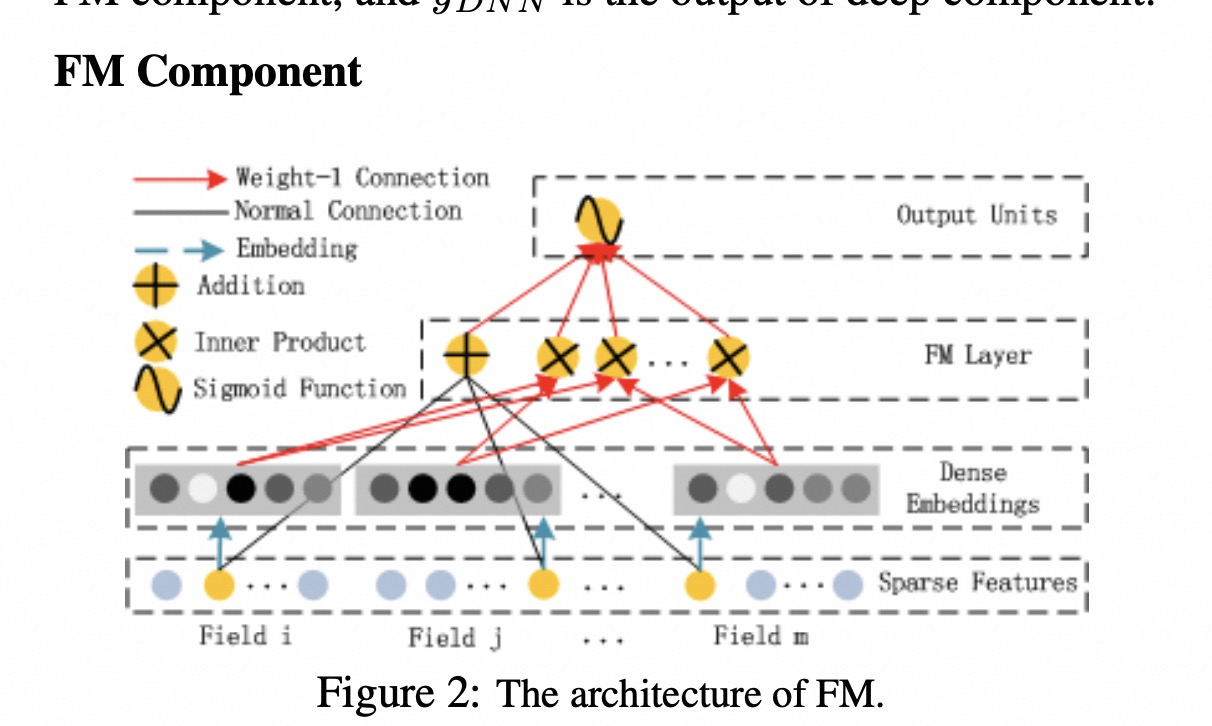


这个公式是因子分解机（Factorization Machines, FM）模型的预测函数，用来计算给定输入特征向量 $ \mathbf{x} $ 的预测值 $ y_{FM} $。FM 模型结合了线性模型和特征交互模型，可以有效地捕捉数据中的特征间相互作用。公式详细解释如下：

$$ y_{FM} = \langle \mathbf{w}, \mathbf{x} \rangle + \sum_{j_1=1}^{d} \sum_{j_2=j_1+1}^{d} \langle \mathbf{V}_{i}, \mathbf{V}_{j} \rangle x_{j_1} \cdot x_{j_2}, $$

公式中的每一部分解释如下：

1. **线性部分**：
   $$
   \langle \mathbf{w}, \mathbf{x} \rangle
   $$
   - $\langle \mathbf{w}, \mathbf{x} \rangle $ 表示输入特征向量 $\mathbf{x}$ 与权重向量 $\mathbf{w}$ 的内积（点积）。这部分是线性模型部分，负责捕捉单个特征的贡献。具体计算公式为：
     $$
     \langle \mathbf{w}, \mathbf{x} \rangle = \sum_{j=1}^{d} w_j \cdot x_j
     $$
     其中 $d$ 是特征的维度，$w_j$ 和 $x_j$ 分别是第 $j$ 个特征的权重和特征值。

2. **特征交互部分**：
   $$
   \sum_{j_1=1}^{d} \sum_{j_2=j_1+1}^{d} \langle \mathbf{V}_{i}, \mathbf{V}_{j} \rangle x_{j_1} \cdot x_{j_2}
   $$
   - 这部分负责捕捉特征间的二阶交互项（即任意两个特征之间的相互作用）。
   - $\mathbf{V}_i$ 和 $\mathbf{V}_j$ 是第 $i$ 和第 $j$ 个特征的嵌入向量。
   - $\langle \mathbf{V}_{i}, \mathbf{V}_{j} \rangle$ 表示第 $i$ 和第 $j$ 个特征嵌入向量之间的内积（点积），计算公式为：
     $$
     \langle \mathbf{V}_{i}, \mathbf{V}_{j} \rangle = \sum_{f=1}^{k} V_{i,f} \cdot V_{j,f}
     $$
     其中 $k$ 是嵌入向量的维度（也称为因子的数量）。
   - $x_{j_1} \cdot x_{j_2}$ 表示输入特征向量中第 $j_1$ 个特征和第 $j_2$ 个特征的乘积。

3. **整体模型**：
   - 公式 $ y_{FM} $ 是线性部分与特征交互部分的总和，既包含了线性特征的贡献也包含了特征间相互作用的贡献。

### 例子
假设有一个简单的三维输入特征向量 $\mathbf{x} = [1, 2, 3] $，权重向量 $\mathbf{w} = [0.1, 0.2, 0.3] $ 和嵌入矩阵 $\mathbf{V}$ 为：

$$
\mathbf{V} = \begin{bmatrix}
0.5 & 0.1 \\
0.4 & 0.2 \\
0.3 & 0.3 \\
\end{bmatrix}
$$

计算过程如下：

1. **线性部分**：
   $$
   \langle \mathbf{w}, \mathbf{x} \rangle = 0.1 \cdot 1 + 0.2 \cdot 2 + 0.3 \cdot 3 = 0.1 + 0.4 + 0.9 = 1.4
   $$

2. **特征交互部分**：
   - $\langle \mathbf{V}_{1}, \mathbf{V}_{2} \rangle = 0.5 \cdot 0.4 + 0.1 \cdot 0.2 = 0.2 + 0.02 = 0.22$
   - $\langle \mathbf{V}_{1}, \mathbf{V}_{3} \rangle = 0.5 \cdot 0.3 + 0.1 \cdot 0.3 = 0.15 + 0.03 = 0.18$
   - $\langle \mathbf{V}_{2}, \mathbf{V}_{3} \rangle = 0.4 \cdot 0.3 + 0.2 \cdot 0.3 = 0.12 + 0.06 = 0.18$

   交互项总和：
   $$
   0.22 \cdot 1 \cdot 2 + 0.18 \cdot 1 \cdot 3 + 0.18 \cdot 2 \cdot 3 = 0.44 + 0.54 + 1.08 = 2.06
   $$

3. **总和**：
   $$
   y_{FM} = 1.4 + 2.06 = 3.46
   $$

因此，对于输入特征向量 $\mathbf{x} = [1, 2, 3] $，因子分解机模型预测的输出值 $y_{FM}$ 为 `3.46`。

这个公式展示了因子分解机如何结合线性项和二阶特征交互项来进行预测，能够捕捉到特征之间的复杂关系。

In [1]:
!pip install numpy -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [30]:
import numpy as np

class FactorizationMachine:
    def __init__(self, n_features, k, learning_rate=0.01, n_epochs=10):
        self.n_features = n_features  # Total number of features
        self.k = k  # Embedding dimension
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

        # Initialize weights
        self.w0 = 0  # Bias term
        self.W = np.zeros(n_features)  # Linear terms
        self.V = np.random.normal(scale=0.01, size=(n_features, k))  # Interaction terms

    def fit(self, X, y):
        """ Train the model with input features X and target y """
        for epoch in range(self.n_epochs):
            for i in range(X.shape[0]):
                self._update_weights(X[i], y[i])

    def _update_weights(self, x, y):
        """ Stochastic Gradient Descent to update weights """
        linear_output = self.w0 + np.dot(self.W, x)
        interaction_output = 0.5 * np.sum(
            (np.dot(x, self.V) ** 2) - np.dot(x ** 2, self.V ** 2)
        )

        prediction = linear_output + interaction_output
        error = y - self.sigmoid(prediction)

        # Update weights
        self.w0 += self.learning_rate * error
        self.W += self.learning_rate * error * x
        for f in range(self.n_features):
            self.V[f] += self.learning_rate * error * (np.dot(x, self.V) - x[f] * self.V[f]) * x[f]

    def predict(self, x):
        """ Make prediction for a single input feature vector x """
        linear_output = self.w0 + np.dot(self.W, x)
        interaction_output = 0.5 * np.sum(
            (np.dot(x, self.V) ** 2) - np.dot(x ** 2, self.V ** 2)
        )
        prediction = linear_output + interaction_output
        return self.sigmoid(prediction)


    @staticmethod
    def sigmoid(x):
        # Clip input values to avoid overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

# Test the Factorization Machine
num_samples = 1000  # Number of samples
num_features = 10  # Number of features
embedding_dim = 5  # Embedding dimension

# Generate random dataset
X = np.random.randint(2, size=(num_samples, num_features))
y = np.random.randint(2, size=num_samples)

# Train Factorization Machine
fm = FactorizationMachine(n_features=num_features, k=embedding_dim, learning_rate=0.01, n_epochs=10)
fm.fit(X, y)

# Make predictions
prediction = fm.predict(X[0])
print(prediction)  # Print first prediction

0.5097546856479731


In [23]:
print(X[0])

[0 0 1 0 1 1 1 0 0 0]
